In [1]:
import numpy as np
import itertools
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import MaxNLocator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def plot_confusion_matrix(cm, classes, model_name,
                          cmap=plt.cm.Blues):
    title = model_name + ': Confusion Matrix'
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

In [3]:
def randomization_test(data1, data2):
    nsamp = 10000
    meandata1 = np.mean(data1)
    n1 = len(data1)
    data = np.append(data1, data2)
    rmean = np.zeros(nsamp)
    
    for repl in range(nsamp):
        rdata1 = np.random.choice(data, n1, replace=False)
        rmean[repl] = (np.mean(rdata1))
    
    more = rmean >= meandata1
    less = rmean <= meandata1
    
    nmore = np.sum(more)
    nless = np.sum(less)
    
    if nless < nmore:
        nmore = nless
    
    # assume alternative hypothesis is two tailed
    pval = 2 * nmore / nsamp
    return pval

In [4]:
test_cell_ids = np.load('/scratch-shared/phil/LNP/LNP_data_09/test_cell_ids_classify_fold1.npy')

tpoints = 'T0001'
for i in range(2, 10):
    tpoints = np.append(tpoints, 'T000' + str(i))
for i in range(10, 21):
    tpoints = np.append(tpoints, 'T00' + str(i))
n_time = len(tpoints)

n_aug = 8
n_folds = 5
n_cells = len(test_cell_ids)

test_y = np.load('/scratch-shared/phil/LNP/LNP_data_09/test_cell_gfp_classify_fold1.npy')

cnn_F1 = np.zeros((n_time, n_folds))
cnn_stats = np.zeros((n_time, 3))

cnn_preds = np.zeros((n_cells, n_time, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/tpoints_test_pred_classify_' + fold + '.npy')
    b = np.asarray(a)
    cnn_preds[:, :, i] = b

cnn_preds = np.round(cnn_preds)

for i in range(n_time):
    
    for j in range(n_folds):
        pred_y = cnn_preds[:, i, j]
        report = classification_report(test_y, pred_y, output_dict=True)
        cnn_F1[i, j] = np.round(report['weighted avg']['f1-score'], decimals=5)
    
    me = np.mean(cnn_F1[i, :])
    sd = np.std(cnn_F1[i, :])
    cnn_stats[i, 0] = me
    cnn_stats[i, 1] = me - sd
    cnn_stats[i, 2] = me + sd

In [5]:
rnn_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/test_pred_classify_lr_00001_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    rnn_preds[:, i] = b

rnn_F1 = np.zeros(n_folds)
rnn_stats = np.zeros(3)
    
rnn_preds = np.round(rnn_preds)

for j in range(n_folds):
    pred_y = rnn_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    rnn_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(rnn_F1)
sd = np.std(rnn_F1)
rnn_stats[0] = me
rnn_stats[1] = me - sd
rnn_stats[2] = me + sd

In [6]:
rnn5_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/test_pred_classify_T5_lr_00001_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    rnn5_preds[:, i] = b

rnn5_F1 = np.zeros(n_folds)
rnn5_stats = np.zeros(3)
    
rnn5_preds = np.round(rnn5_preds)

for j in range(n_folds):
    pred_y = rnn5_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    rnn5_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(rnn5_F1)
sd = np.std(rnn5_F1)
rnn5_stats[0] = me
rnn5_stats[1] = me - sd
rnn5_stats[2] = me + sd

In [7]:
rnn10_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/test_pred_classify_T10_lr_00001_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    rnn10_preds[:, i] = b

rnn10_F1 = np.zeros(n_folds)
rnn10_stats = np.zeros(3)
    
rnn10_preds = np.round(rnn10_preds)

for j in range(n_folds):
    pred_y = rnn10_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    rnn10_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(rnn10_F1)
sd = np.std(rnn10_F1)
rnn10_stats[0] = me
rnn10_stats[1] = me - sd
rnn10_stats[2] = me + sd

In [8]:
rnn15_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/test_pred_classify_T15_lr_00001_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    rnn15_preds[:, i] = b

rnn15_F1 = np.zeros(n_folds)
rnn15_stats = np.zeros(3)
    
rnn15_preds = np.round(rnn15_preds)

for j in range(n_folds):
    pred_y = rnn15_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    rnn15_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(rnn15_F1)
sd = np.std(rnn15_F1)
rnn15_stats[0] = me
rnn15_stats[1] = me - sd
rnn15_stats[2] = me + sd

In [9]:
tsf_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/tsf_efficient_test_pred_classify_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    tsf_preds[:, i] = b

tsf_F1 = np.zeros(n_folds)
tsf_stats = np.zeros(3)
    
tsf_preds = np.round(tsf_preds)

for j in range(n_folds):
    pred_y = tsf_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    tsf_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(tsf_F1)
sd = np.std(tsf_F1)
tsf_stats[0] = me
tsf_stats[1] = me - sd
tsf_stats[2] = me + sd

In [10]:
tsf5_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/tsf_efficient_test_pred_classify_T5_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    tsf5_preds[:, i] = b

tsf5_F1 = np.zeros(n_folds)
tsf5_stats = np.zeros(3)
    
tsf5_preds = np.round(tsf5_preds)

for j in range(n_folds):
    pred_y = tsf5_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    tsf5_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(tsf5_F1)
sd = np.std(tsf5_F1)
tsf5_stats[0] = me
tsf5_stats[1] = me - sd
tsf5_stats[2] = me + sd

In [11]:
tsf10_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/tsf_efficient_test_pred_classify_T10_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    tsf10_preds[:, i] = b

tsf10_F1 = np.zeros(n_folds)
tsf10_stats = np.zeros(3)
    
tsf10_preds = np.round(tsf10_preds)

for j in range(n_folds):
    pred_y = tsf10_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    tsf10_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(tsf10_F1)
sd = np.std(tsf10_F1)
tsf10_stats[0] = me
tsf10_stats[1] = me - sd
tsf10_stats[2] = me + sd

In [12]:
tsf15_preds = np.zeros((n_cells, n_folds))

for i in range(n_folds):
    fold = 'fold' + str(i + 1)
    a = np.load('/scratch-shared/phil/LNP/LNP_data_09/tsf_efficient_test_pred_classify_T15_' + fold + '.npy')
    a = np.ndarray.flatten(a)
    b = np.asarray(a)
    tsf15_preds[:, i] = b

tsf15_F1 = np.zeros(n_folds)
tsf15_stats = np.zeros(3)
    
tsf15_preds = np.round(tsf15_preds)

for j in range(n_folds):
    pred_y = tsf15_preds[:, j]
    report = classification_report(test_y, pred_y, output_dict=True)
    tsf15_F1[j] = np.round(report['weighted avg']['f1-score'], decimals=5)

me = np.mean(tsf15_F1)
sd = np.std(tsf15_F1)
tsf15_stats[0] = me
tsf15_stats[1] = me - sd
tsf15_stats[2] = me + sd

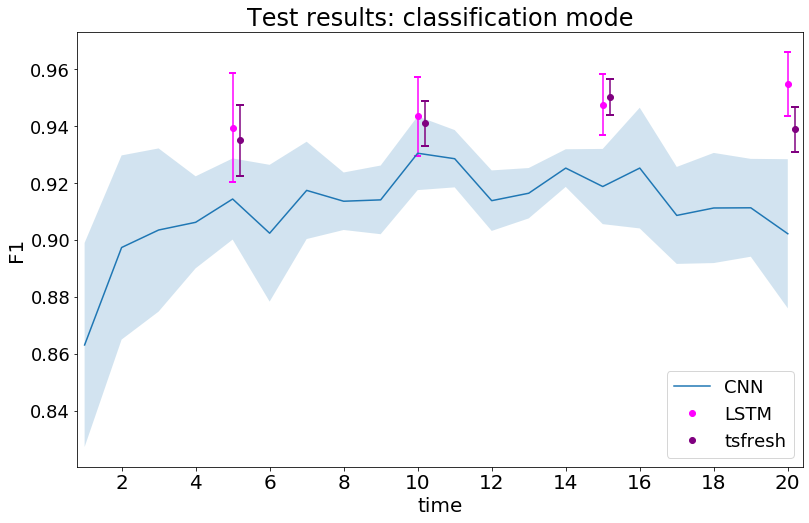

In [16]:
matplotlib.rc('ytick', labelsize=18)
ax = plt.figure(figsize=(13,8), facecolor='w').gca()

ax.plot(np.arange(20) + 1, cnn_stats[:, 0], '-', label='CNN')
ax.fill_between(np.arange(20) + 1, cnn_stats[:, 1], cnn_stats[:, 2], alpha=0.2)

ax.plot(5.0, rnn5_stats[0], '.', color='magenta', markersize=12, label='LSTM')
ax.vlines(5.0, rnn5_stats[1], rnn5_stats[2], color='magenta')
ax.hlines(rnn5_stats[1], 5-0.1, 5+0.1, color='magenta', linewidth=2)
ax.hlines(rnn5_stats[2], 5-0.1, 5+0.1, color='magenta', linewidth=2)

ax.plot(10.0, rnn10_stats[0], '.', color='magenta', markersize=12)
ax.vlines(10.0, rnn10_stats[1], rnn10_stats[2], color='magenta')
ax.hlines(rnn10_stats[1], 10-0.1, 10+0.1, color='magenta', linewidth=2)
ax.hlines(rnn10_stats[2], 10-0.1, 10+0.1, color='magenta', linewidth=2)

ax.plot(15.0, rnn15_stats[0], '.', color='magenta', markersize=12)
ax.vlines(15.0, rnn15_stats[1], rnn15_stats[2], color='magenta')
ax.hlines(rnn15_stats[1], 15-0.1, 15+0.1, color='magenta', linewidth=2)
ax.hlines(rnn15_stats[2], 15-0.1, 15+0.1, color='magenta', linewidth=2)

ax.plot(20.0, rnn_stats[0], '.', color='magenta', markersize=12)
ax.vlines(20.0, rnn_stats[1], rnn_stats[2], color='magenta')
ax.hlines(rnn_stats[1], 20-0.1, 20+0.1, color='magenta', linewidth=2)
ax.hlines(rnn_stats[2], 20-0.1, 20+0.1, color='magenta', linewidth=2)

ax.plot(20.2, tsf_stats[0], '.', color='purple', markersize=12, label='tsfresh')
ax.vlines(20.2, tsf_stats[1], tsf_stats[2], color='purple')
ax.hlines(tsf_stats[1], 20.2-0.1, 20.2+0.1, color='purple', linewidth=2)
ax.hlines(tsf_stats[2], 20.2-0.1, 20.2+0.1, color='purple', linewidth=2)

ax.plot(5.2, tsf5_stats[0], '.', color='purple', markersize=12)
ax.vlines(5.2, tsf5_stats[1], tsf5_stats[2], color='purple')
ax.hlines(tsf5_stats[1], 5.2-0.1, 5.2+0.1, color='purple', linewidth=2)
ax.hlines(tsf5_stats[2], 5.2-0.1, 5.2+0.1, color='purple', linewidth=2)

ax.plot(10.2, tsf10_stats[0], '.', color='purple', markersize=12)
ax.vlines(10.2, tsf10_stats[1], tsf10_stats[2], color='purple')
ax.hlines(tsf10_stats[1], 10.2-0.1, 10.2+0.1, color='purple', linewidth=2)
ax.hlines(tsf10_stats[2], 10.2-0.1, 10.2+0.1, color='purple', linewidth=2)

ax.plot(15.2, tsf15_stats[0], '.', color='purple', markersize=12)
ax.vlines(15.2, tsf15_stats[1], tsf15_stats[2], color='purple')
ax.hlines(tsf15_stats[1], 15.2-0.1, 15.2+0.1, color='purple', linewidth=2)
ax.hlines(tsf15_stats[2], 15.2-0.1, 15.2+0.1, color='purple', linewidth=2)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim(0.8, 20.4)

ax.set_title('Test results: classification mode', fontsize=24)
ax.set_xlabel('time', fontsize=20)
ax.set_ylabel('F1', fontsize=20)
ax.legend(loc='lower right', prop=dict(size=18))
ax.tick_params(axis='x', labelsize=20)

plt.show()
plt.close()

In [14]:
cnn_all = cnn_F1[[4, 9, 14, 19], :]
rnn_all = np.row_stack((rnn5_F1, rnn10_F1, rnn15_F1, rnn_F1))
tsf_all = np.row_stack((tsf5_F1, tsf10_F1, tsf15_F1, tsf_F1))

res = np.zeros((3, 4))
for i in range(4):
    res[0, i] = randomization_test(cnn_all[i], rnn_all[i])
    res[1, i] = randomization_test(cnn_all[i], tsf_all[i])
    res[2, i] = randomization_test(rnn_all[i], tsf_all[i])
res = np.round(res, 3)

In [15]:
row_names = ['CNN vs LSTM', 'CNN vs tsfresh', 'LSTM vs tsfresh']
col_names = [5, 10, 15, 20]
pd.DataFrame(res, index=row_names, columns=col_names)

,5,10,15,20
CNN vs LSTM,0.072,0.211,0.023,0.015
CNN vs tsfresh,0.055,0.239,0.006,0.030
LSTM vs tsfresh,0.718,0.734,0.665,0.077
